In [5]:

%reset
import sys
import matplotlib
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

matplotlib.rcParams['text.usetex'] = False
# matplotlib.rcParams['text.latex.unicode'] = True

%matplotlib inline



Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
mice_all = fits.open('/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/MICE2_all_galaxies_ds_2.fits')



In [7]:
mag_i_true = mice_all[1].data['des_asahi_full_i_true']

mag_i_abs = mice_all[1].data['des_asahi_full_i_abs_mag']

ra_gal, dec_gal, z_gal, gal_id, halo_id, lmhalo, iscenter = mice_all[1].data['ra_gal'],mice_all[1].data['dec_gal'],mice_all[1].data['z_cgal'],mice_all[1].data['unique_gal_id'],mice_all[1].data['unique_halo_id'],mice_all[1].data['lmhalo'],mice_all[1].data['flag_central']      



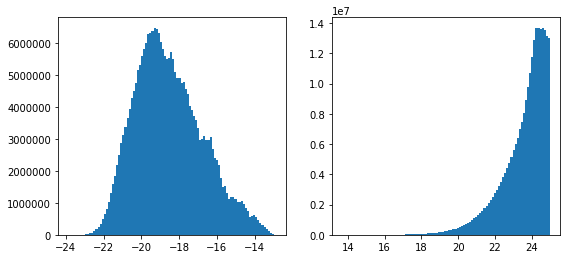

In [8]:
fig, ax = plt.subplots(1,2, figsize=(9, 4))

hist0 = ax[0].hist(mag_i_abs,bins=100)
hist1 = ax[1].hist(mag_i_true,bins=100)



In [9]:

maglim_sel = np.where((mag_i_true > 17.5) & (mag_i_true < 4*z_gal + 18))[0]





In [10]:
len(maglim_sel)




3002901

In [11]:
len(ra_gal)



249804915

In [12]:
np.max(z_gal)



1.41708

In [13]:
z_new = z_gal[maglim_sel]




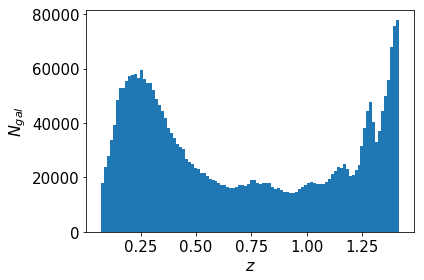

In [14]:
fig, ax = plt.subplots(1,1, figsize=(6, 4))

hist0 = ax.hist(z_new,bins=100)

ax.set_xlabel(r'$z$',size=16)
ax.set_ylabel(r'$N_{gal}$',size=16)

ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)

fig.tight_layout()

fig.savefig('maglim_mice.png')


In [18]:
c1 = fits.Column(name='RA', format='E', array=ra_gal[maglim_sel])
c2 = fits.Column(name='DEC', format='E', array=dec_gal[maglim_sel])
c3 = fits.Column(name='Z', format='E', array=z_gal[maglim_sel])
c4 = fits.Column(name='gal_id', format='E', array=gal_id[maglim_sel])
c5 = fits.Column(name='halo_id', format='E', array=halo_id[maglim_sel])
c6 = fits.Column(name='lmhalo', format='E', array=lmhalo[maglim_sel])
c7 = fits.Column(name='iscenter', format='E', array=iscenter[maglim_sel])

CC = [c1, c2, c3, c4, c5, c6, c7]
hdu = fits.BinTableHDU.from_columns(CC, nrows=len(ra_gal[maglim_sel]))
hdu.writeto('/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/micey1_maglim_ds2.fits', clobber=True)



In [19]:
load_filename_galaxy_randoms = '/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/process_cats/randoms_galaxy_ra_dec_r_z_bin_jk_maglim_mice2_des_run_redmapper_v6.4.16_redmagic_redmagic_njkradec_180_njkz_1_ds_2.fits'   


load_cat_rand_g = fits.open(load_filename_galaxy_randoms)


In [20]:
ra_rand_g, dec_rand_g, r_rand_g, z_rand_g, bin_rand_g, jk_rand_g = load_cat_rand_g[1].data['RA'], \
                                                                   load_cat_rand_g[1].data['DEC'], \
                                                                   load_cat_rand_g[1].data['R'], \
                                                                   load_cat_rand_g[1].data['Z'], \
                                                                   load_cat_rand_g[1].data['BIN'], \
                                                                   load_cat_rand_g[1].data['JK']



In [23]:
load_filename_galaxy = '/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/process_cats/galaxy_ra_dec_r_z_bin_jk_maglim_mice2_des_run_redmapper_v6.4.16_redmagic_njkradec_180_njkz_1_ds_2.fits'   
load_cat_g = fits.open(load_filename_galaxy)

ra_g, dec_g, r_g, z_g, bin_g, jk_g = load_cat_g[1].data['RA'], load_cat_g[1].data['DEC'], load_cat_g[1].data['R'], \
                                         load_cat_g[1].data['Z'], load_cat_g[1].data['BIN'], load_cat_g[1].data['JK']



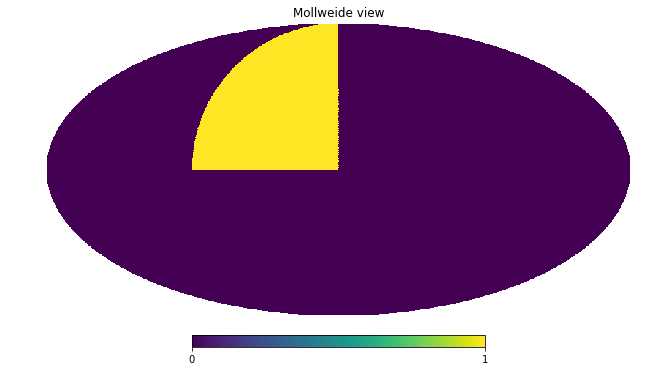

In [24]:
def eq2ang(ra, dec):
    phi = ra * np.pi / 180.
    theta = (np.pi / 2.) - dec * (np.pi / 180.)
    return theta, phi

import healpy as hp
theta_g, phi_g = eq2ang(ra_g, dec_g)
ind_m_f = hp.ang2pix(128, theta_g, phi_g)
mask_m = np.zeros(hp.nside2npix(128))
mask_m[ind_m_f] = 1
plt.figure()
hp.mollview(mask_m)



(array([2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 3.00659e+05, 6.02897e+05, 5.97890e+05]),
 array([-269.99963 , -233.99976 , -197.99988 , -162.      , -126.00012 ,
         -90.000244,  -54.000362,  -18.000483,   17.999395,   53.999275,
          89.99915 ], dtype=float32),
 <a list of 10 Patch objects>)

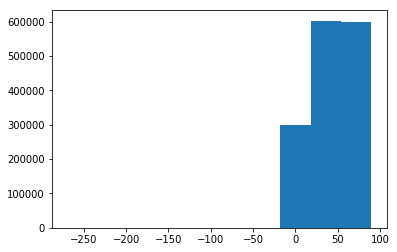

In [27]:
plt.figure()
plt.hist(ra_g)



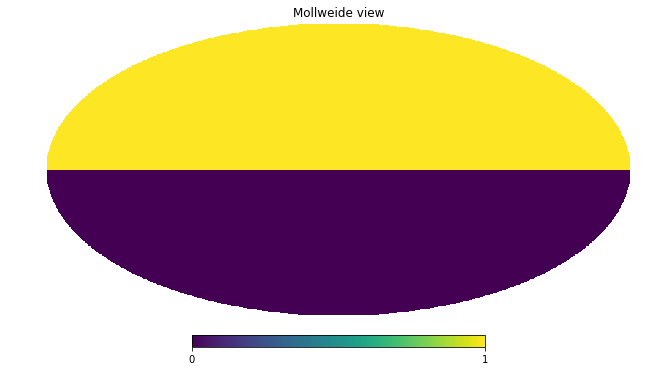

In [22]:
def eq2ang(ra, dec):
    phi = ra * np.pi / 180.
    theta = (np.pi / 2.) - dec * (np.pi / 180.)
    return theta, phi

import healpy as hp
theta_g, phi_g = eq2ang(ra_rand_g, dec_rand_g)
ind_m_f = hp.ang2pix(128, theta_g, phi_g)
mask_m = np.zeros(hp.nside2npix(128))
mask_m[ind_m_f] = 1
plt.figure()
hp.mollview(mask_m)

